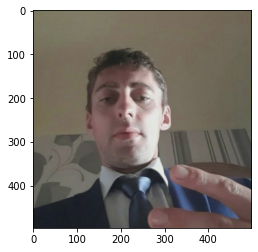

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

img = cv2.imread('sulim.jpg')

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)
plt.show()

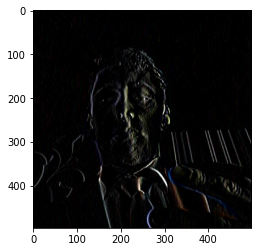

In [16]:
sobel = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)

plt.imshow(sobel)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


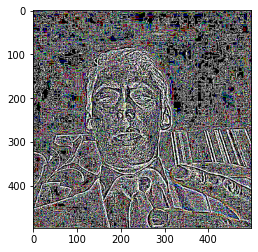

In [20]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)

plt.imshow(laplacian)
plt.show()

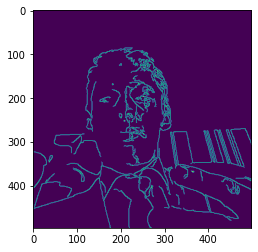

In [21]:
canny = cv2.Canny(img, 50, 150)

plt.imshow(canny)
plt.show()

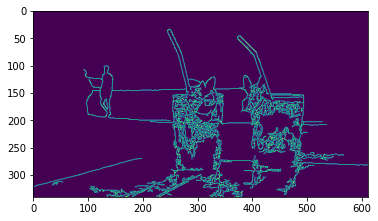

In [121]:
import cv2
import numpy as np
  
# Let's load a simple image with 3 black squares
image = cv2.imread('things.jpg')
  
# Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Find Canny edges
edged = cv2.Canny(gray, 30, 500)
  
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edged, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

plt.imshow(edged)
plt.show()

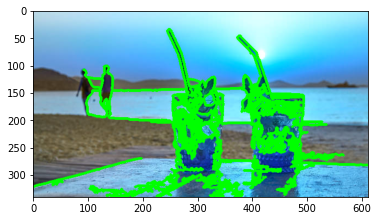

In [122]:
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

plt.imshow(image)
plt.show()

In [118]:
print(len(contours))

51


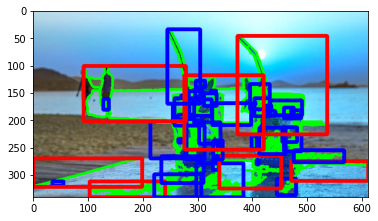

In [125]:
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if w > 100:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 5)
    else:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 5)
        
plt.imshow(image)
plt.show()

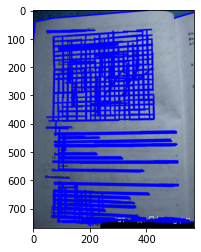

In [173]:
import math
squares = cv2.imread('squares.jpg')
gray_squares = cv2.cvtColor(squares,cv2.COLOR_BGR2GRAY)
edges_squares = cv2.Canny(gray_squares,50,150,apertureSize = 3)
    
    # Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(edges_squares, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)
    
lines = cv.HoughLines(edges_squares, 1, np.pi / 180, 150, None, 0, 0)
    
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
    
    
linesP = cv2.HoughLinesP(edges_squares, 1, np.pi / 180, 50, None, 50, 10)
    
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(squares, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

plt.imshow(squares)
plt.show()

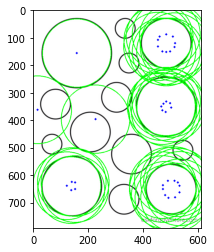

In [168]:
# Read image as gray-scale
img = cv2.imread('circles.jpg', cv2.IMREAD_COLOR)
# Convert to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image to reduce noise
img_blur = cv2.medianBlur(gray, 5)
# Apply hough transform on the image
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, img.shape[0]/64, param1=200, param2=10, minRadius=120, maxRadius=125)
# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw inner circle
        cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)

plt.imshow(img)
plt.show()